### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%207-%20Deep%20Sequence%20Modeling/Module7_UnivariateTS_DNN_RNN_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 6- Deep Neural Networks with Tensorflow and Keras

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow first: https://www.tensorflow.org/install


In [53]:
import tensorflow
tensorflow.__version__

'2.17.0'

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
data.index = pd.to_datetime(data.index)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Making supervised ML/DL data

In [56]:
test_period = 12
train_period = len(data) - test_period

print(f"Train period: {train_period}")
print(f"Test period: {test_period}")

Train period: 132
Test period: 12


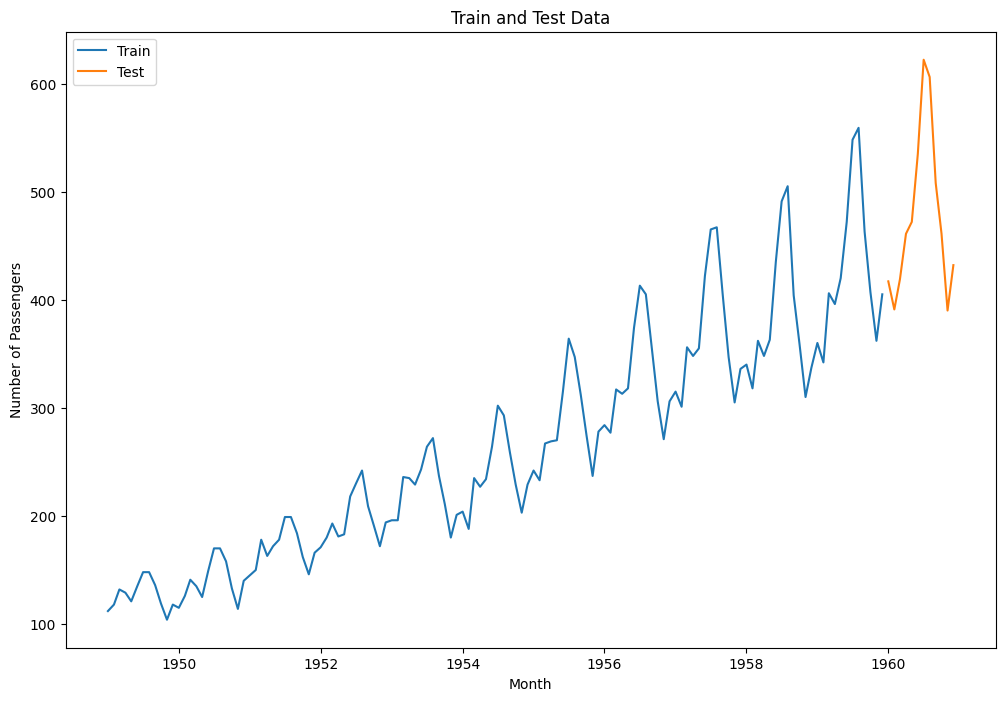

In [57]:
train = data.iloc[:train_period]
test = data.iloc[train_period:]

# plotting the train and test data with different colors
plt.figure(figsize=(12, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train and Test Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [58]:
# A Boolean series indicating which rows of the DataFrame data belong to each set (train, test)
train_indicator = (data.index <= train.index[-1])
test_indicator =  (data.index > train.index[-1])

In [59]:
# creating feature space X and target variable y for the training and test datasets
series = data['Passengers'].dropna().to_numpy()

In [60]:
len(series)

144

In [61]:
Tx = 12 # Number of lags! using the past Tx observations to forecast the next one.
Ty = 1 #  Forecasting Ty outputs at once
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
Y = np.array([series[t+Tx: t+Tx+Ty] for t in range(len(series) - Tx-Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (132, 12) Y: (132, 1) N: 132


In [62]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

# printing shapes
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(120, 12) (120, 1) (12, 12) (12, 1)


## DNN model

We start from a very simple DNN architecture, later in the course we will improve this by RNN and LSTM.

In [63]:
# creating the DNN model using functional API and build model function.
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_DNN_model(Tx, Ty):
    i = Input(shape=(Tx,))
    x = Dense(32, activation='relu')(i)
    x = Dense(16, activation='relu')(x)
    output = Dense(Ty , activation = 'linear')(x)
    model = Model(i, output)
    model.compile(loss='mse', optimizer='adam')
    return model

In [64]:
#Tx = 12 # number of lags
#Ty = 1
model_DNN = build_DNN_model(Tx, Ty)
model_DNN.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# 12 (inputs) * 32 (neurons) + 32 (bias) = 416
12*32+32

416

In [66]:
# training the model
model_DNN.fit(Xtrain, Ytrain, epochs=100, batch_size=16, validation_data=(Xtest, Ytest))


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 99235.2109 - val_loss: 147765.2969
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49082.5430 - val_loss: 68540.1953
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22699.8789 - val_loss: 28707.8066
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9279.7061 - val_loss: 11384.7383
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3845.0310 - val_loss: 5308.1973
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1990.0951 - val_loss: 4058.7048
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1252.4839 - val_loss: 4390.8535
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1551.5146 - val_loss: 4171.3066
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1402.1244 - val_loss: 3608.2644
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1244.5642 - val_loss: 3267.9480
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1081.9333 - val_loss: 3053.7090
Epoch 12/1

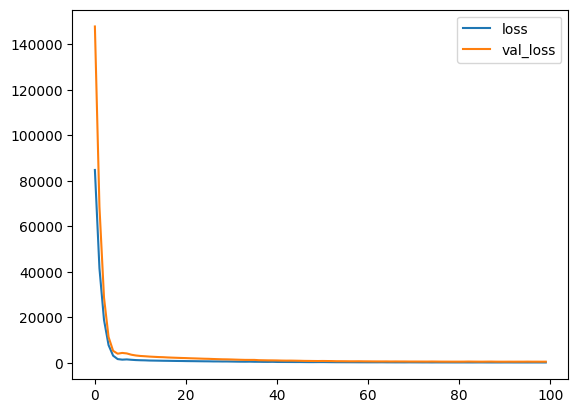

In [67]:
# creating loss dataframe
loss_df = pd.DataFrame(model_DNN.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

## One step ahead forecast

At each point in time (either in train or test set) we have access to the past Tx lags actual observations.

In [68]:
train_indicator[:Tx] = False # the first Tx values are not predictable.
# because we need Tx lags to predict the next value

In [69]:
# making predictions with model_DNN
DNN_1step_train_forecast = model_DNN.predict(Xtrain)
DNN_1step_test_forecast = model_DNN.predict(Xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [70]:
# plotting one step ahead forecast

data.loc[train_indicator, 'DNN_1step_train_forecast'] = DNN_1step_train_forecast
data.loc[test_indicator, 'DNN_1step_test_forecast'] = DNN_1step_test_forecast
data.head(15)

,Passengers,DNN_1step_train_forecast,DNN_1step_test_forecast
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,NaN,NaN
1949-08-01,148,NaN,NaN
1949-09-01,136,NaN,NaN


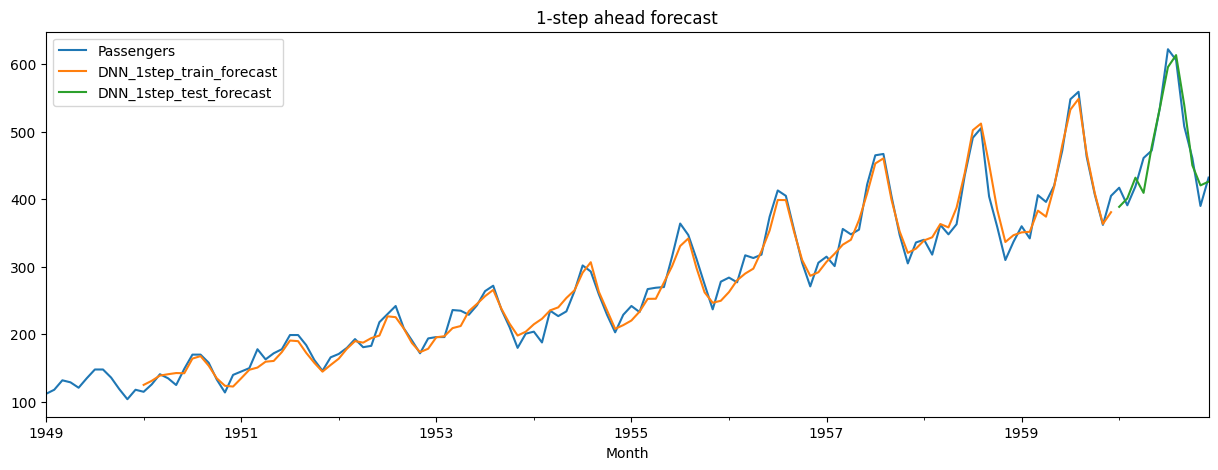

In [71]:
# plot 1-step forecast
data[['Passengers', 'DNN_1step_train_forecast', 'DNN_1step_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step ahead forecast')
plt.show()


## RNN Model

In [72]:
# now let's do a simple RNN model with sequence length of 12
sequence_length = 12
n_features = 1

Preparing the data for sequence modeling:

In [73]:
Tx = sequence_length # Number of lags! using the past Tx observations to forecast the next one.
Ty = 1 #  Forecasting Ty outputs at once
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
# we need to reshape X as sequence of data for RNN:
X = np.array(X).reshape(-1, Tx, 1)


Y = np.array([series[t+Tx: t+Tx+Ty] for t in range(len(series) - Tx-Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (132, 12, 1) Y: (132, 1) N: 132


In [74]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

# printing shapes
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(120, 12, 1) (120, 1) (12, 12, 1) (12, 1)


In [75]:
# Creating a simple RNN model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.1)  

def build_RNN_model(sequence_length, n_features, Ty):
    i = Input(shape=(sequence_length,n_features))
    x = layers.SimpleRNN(16, return_sequences=False)(i) # each recurrent cell has one output when return sequence = False
    output = Dense(Ty , activation = 'linear')(x)
    model = Model(i, output)
    model.compile(loss='mse', optimizer=optimizer)
    return model


In [76]:
model_RNN = build_RNN_model(12,1, 1)
model_RNN.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# (1 feature * 16) + (16 * 16) + 16 (bias terms)
1*16+16*16+16

288

In [78]:
history = model_RNN.fit(Xtrain,Ytrain, epochs=100, validation_data=(Xtest,Ytest))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 80279.8125 - val_loss: 225672.0000
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80834.7734 - val_loss: 219678.4531
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80946.0312 - val_loss: 213633.7969
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72474.3672 - val_loss: 207653.6406
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69544.0312 - val_loss: 201764.3906
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67528.3125 - val_loss: 195979.9531
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67827.1719 - val_loss: 190314.9219
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62156.5859 - val_loss: 184800.0781
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64178.7773 - val_loss: 179423.6719
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59604.4102 - val_loss: 174210.9531
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52972.0078 - val_los

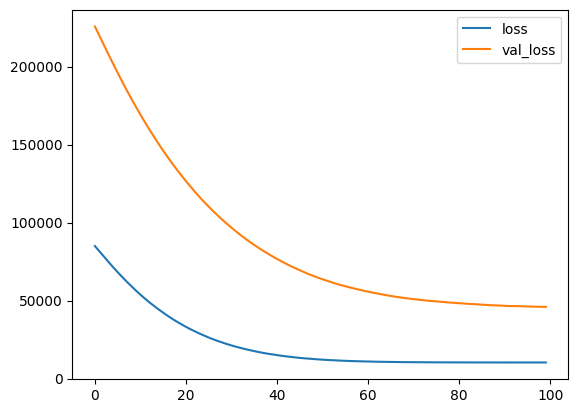

In [79]:
# creating loss dataframe
loss_df = pd.DataFrame(model_RNN.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

## One step ahead forecast

At each point in time (either in train or test set) we have access to the past Tx lags actual observations.

In [80]:
train_indicator[:Tx] = False # the first Tx values are not predictable.
# because we need Tx lags to predict the next value

In [81]:
# making predictions with model_DNN
RNN_1step_train_forecast = model_RNN.predict(Xtrain)
RNN_1step_test_forecast = model_RNN.predict(Xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [82]:
# plotting one step ahead forecast

data.loc[train_indicator, 'RNN_1step_train_forecast'] = RNN_1step_train_forecast
data.loc[test_indicator, 'RNN_1step_test_forecast'] = RNN_1step_test_forecast
data.head()

,Passengers,DNN_1step_train_forecast,DNN_1step_test_forecast,RNN_1step_train_forecast,RNN_1step_test_forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN,NaN
1949-04-01,129,NaN,NaN,NaN,NaN
1949-05-01,121,NaN,NaN,NaN,NaN


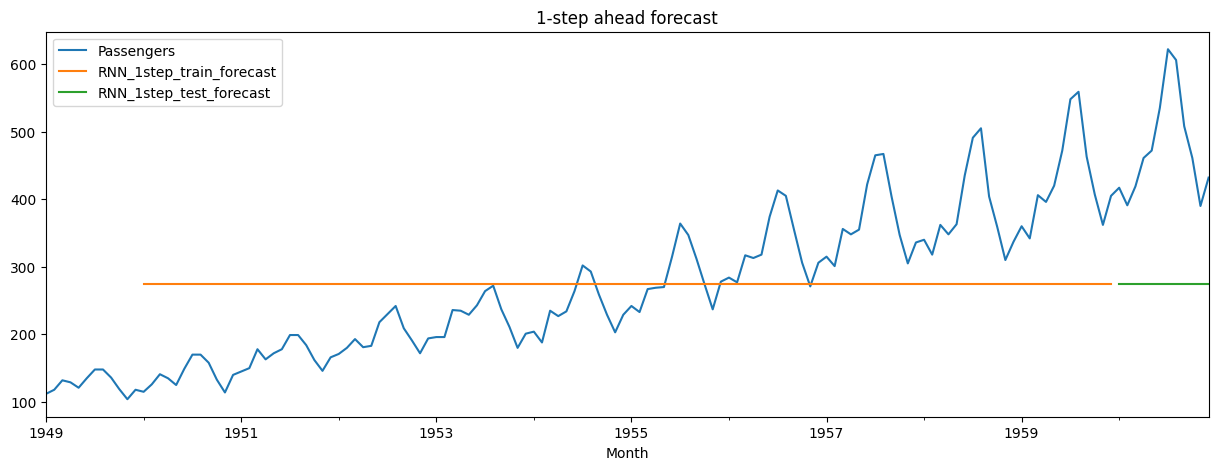

In [83]:
# plot 1-step forecast
data[['Passengers', 'RNN_1step_train_forecast', 'RNN_1step_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step ahead forecast')
plt.show()


# Forecast comparison

In [84]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error

passenger_test = data.loc[test_indicator, 'Passengers']
mape1 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'DNN_1step_test_forecast'])
mape2 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'RNN_1step_test_forecast'])
print("DNN 1step_test MAPE:", mape1)
print("RNN 1step_test MAPE:", mape2)



DNN 1step_test MAPE: 0.04007310346423627
RNN 1step_test MAPE: 0.4091577897553986


# What's going on? Is RNN failing?

Note that the Dense Neural Network (DNN) model works well on the unprocessed airline passenger data, even without preprocessing steps like differencing or logarithmic transformation, while the Recurrent Neural Network (RNN) requires these preprocessing steps to perform effectively.

This can be attributed to several factors related to the nature of DNNs and how they process information compared to RNNs:

**DNNs and Feature Representation**

1. **Independent Feature Handling**: In the DNN model, the 12 lags are treated as independent features. This setup allows the DNN to directly learn from the absolute values of the data, including its trend and seasonality, without necessarily understanding their sequential nature. If the trend is strong and consistent, the DNN might effectively use these lags to make accurate predictions simply based on the observed patterns across these features.

2. **Pattern Mapping**: DNNs can map input features to outputs through layers of abstraction without needing the data to be stationary. If the historical lags (used as independent features) contain enough information to predict the future values under the assumption of continuing trends and seasonality, the DNN can capture this relationship.

3. **Lack of Temporal Dynamics**: Unlike RNNs, DNNs do not model temporal dynamics explicitly. This means they don't have to learn the underlying time-based structure of the data. In cases where the pattern between the input features and the target is relatively straightforward and doesn't require understanding the sequence of events, DNNs can perform surprisingly well.

**RNNs and Sequential Data**
1. **Sequential Processing:** RNNs process data sequentially and rely on capturing the dependencies and relationships across time steps. When the data exhibits non-stationary characteristics such as trends and seasonality, the model's ability to learn these dependencies can be hampered without preprocessing. The changing mean and variance over time can make it difficult for the RNN to generalize well from the training data to unseen future data.

2. **Need for Stationarity**: For RNNs, making the data stationary (through differencing or transformations) helps expose the underlying patterns in the data more clearly, allowing the model to focus on learning these temporal dependencies without the distraction of a trending mean or varying variance.

**Conclusion**

The effectiveness of DNNs on the raw passenger data can be seen as a result of their ability to leverage the absolute values of the lags as distinct, independent features, which might inherently capture the trend and seasonality present in the data. On the other hand, RNNs, which are designed to understand and predict based on the sequential nature and relationships of data, benefit from preprocessing steps that make these relationships more explicit and the data characteristics (like mean and variance) more consistent over time.

This highlights an important aspect of machine learning and time series forecasting: the choice of model and preprocessing steps can significantly depend on the data's characteristics and the specific modeling goals. Experimentation and validation are key to finding the best approach for a given dataset.

## Pre-processing the data

In [85]:
data_transformed = data[['Passengers']]
data_transformed.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [86]:
data_transformed['log_passengers'] = np.log(data_transformed['Passengers'])
data_transformed['diff_log_passengers'] = data_transformed['log_passengers'].diff()
data_transformed.head()

,Passengers,log_passengers,diff_log_passengers
Month,,,
1949-01-01,112,4.718499,NaN
1949-02-01,118,4.770685,0.052186
1949-03-01,132,4.882802,0.112117
1949-04-01,129,4.859812,-0.022990
1949-05-01,121,4.795791,-0.064022


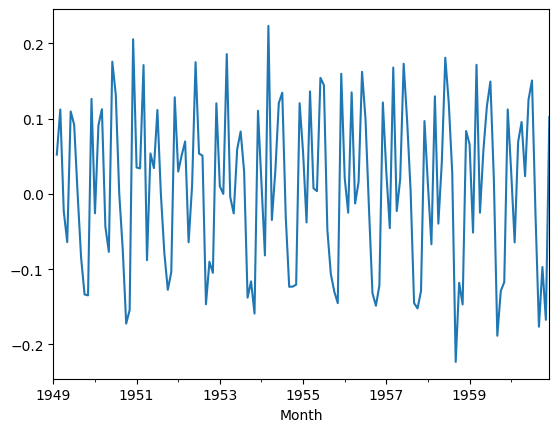

In [87]:
data_transformed['diff_log_passengers'].plot()
plt.show()

In [88]:
series = data_transformed['diff_log_passengers'].dropna().to_numpy()

In [89]:
# now let's do a simple RNN model with sequence length of 12
sequence_length = 12
n_features = 1

Preparing the data for sequence modeling:

In [90]:
Tx = sequence_length # Number of lags! using the past Tx observations to forecast the next one.
Ty = 1 #  Forecasting Ty outputs at once
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
# we need to reshape X as sequence of data for RNN:
X = np.array(X).reshape(-1, Tx, 1)


Y = np.array([series[t+Tx: t+Tx+Ty] for t in range(len(series) - Tx-Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (131, 12, 1) Y: (131, 1) N: 131


In [91]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

# printing shapes
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(119, 12, 1) (119, 1) (12, 12, 1) (12, 1)


In [92]:
# Creating a simple RNN model
from tensorflow.keras import layers

def build_RNN_model(sequence_length, n_features, Ty):
    i = Input(shape=(sequence_length,n_features))
    x = layers.SimpleRNN(16, return_sequences=False)(i) # each recurrent cell has one output when return sequence = False
    output = Dense(Ty , activation = 'linear')(x)
    model = Model(i, output)
    model.compile(loss='mse', optimizer='adam')
    return model


In [93]:
model_RNN = build_RNN_model(12,1, 1)
model_RNN.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
history = model_RNN.fit(Xtrain,Ytrain, epochs=100, validation_data=(Xtest,Ytest))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0162 - val_loss: 0.0102
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - val_loss: 0.0073
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - val_loss: 0.0045
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0036
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - val_loss: 0.0021


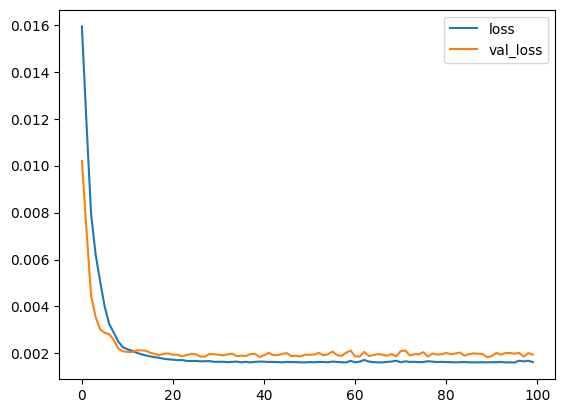

In [95]:
# creating loss dataframe
loss_df = pd.DataFrame(model_RNN.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

## One step ahead forecast

At each point in time (either in train or test set) we have access to the past Tx lags actual observations.

In [96]:
train_indicator[:Tx+1] = False # the first Tx+1 values are not predictable.
# because we need Tx lags to predict the next value and we are using differenced data

In [97]:
data_transformed.head()

,Passengers,log_passengers,diff_log_passengers
Month,,,
1949-01-01,112,4.718499,NaN
1949-02-01,118,4.770685,0.052186
1949-03-01,132,4.882802,0.112117
1949-04-01,129,4.859812,-0.022990
1949-05-01,121,4.795791,-0.064022


In [98]:
# making predictions with model_DNN
RNN_1step_train_forecast = model_RNN.predict(Xtrain).flatten()
RNN_1step_test_forecast = model_RNN.predict(Xtest).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [99]:
# Need to calculate the un-differenced predictions
data_transformed['ShiftLogPassengers'] = data_transformed['log_passengers'].shift(1)
prev_log_passenger = data_transformed['ShiftLogPassengers']

In [100]:
# plotting one step ahead forecast
# note we are unlogging the predictions as well.

data_transformed.loc[train_indicator, 'RNN_1step_train_forecast'] = np.exp(prev_log_passenger[train_indicator] + RNN_1step_train_forecast )
data_transformed.loc[test_indicator, 'RNN_1step_test_forecast'] =   np.exp(prev_log_passenger[test_indicator] + RNN_1step_test_forecast )
data_transformed.head()

,Passengers,log_passengers,diff_log_passengers,ShiftLogPassengers,RNN_1step_train_forecast,RNN_1step_test_forecast
Month,,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN,NaN
1949-02-01,118,4.770685,0.052186,4.718499,NaN,NaN
1949-03-01,132,4.882802,0.112117,4.770685,NaN,NaN
1949-04-01,129,4.859812,-0.022990,4.882802,NaN,NaN
1949-05-01,121,4.795791,-0.064022,4.859812,NaN,NaN


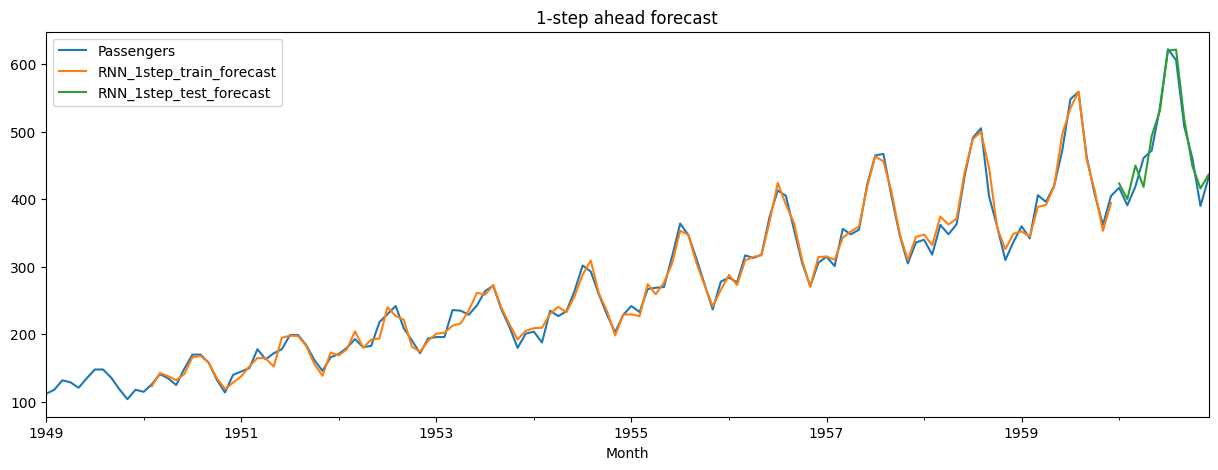

In [101]:
# plot 1-step forecast
data_transformed[['Passengers', 'RNN_1step_train_forecast', 'RNN_1step_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step ahead forecast')
plt.show()


# Forecast comparison

In [102]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error

passenger_test = data.loc[test_indicator, 'Passengers']
mape1 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'DNN_1step_test_forecast'])
mape2 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'RNN_1step_test_forecast'])
mape3 = mean_absolute_percentage_error(passenger_test, data_transformed.loc[test_indicator, 'RNN_1step_test_forecast'])

print("DNN 1step_test MAPE:", mape1)
print("Raw non-stationary data RNN 1step_test MAPE:", mape2)
print("Transformed stationary data RNN 1step_test MAPE:", mape3)





DNN 1step_test MAPE: 0.04007310346423627
Raw non-stationary data RNN 1step_test MAPE: 0.4091577897553986
Transformed stationary data RNN 1step_test MAPE: 0.034198372110607785


# Done!